# Comparison between RS and CZT

In this example, we will analyze how CZT algorithm produces better results than in RS when the region of interest in the focus of a lens.

## X Scheme

In [1]:
from diffractio import mm, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X

In [2]:
focal = 25 * mm
diameter = 4 * mm

# Initial parameters
x0 = np.linspace(-diameter / 2 - 50 * um, diameter / 2 + 50 * um, 4096)
wavelength = 0.6238 * um

# Definition of source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1)

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.lens(x0=0.0, focal=focal, radius=diameter / 2)

u1 = t0 * u0

**RS**

NameError: name 'plt' is not defined

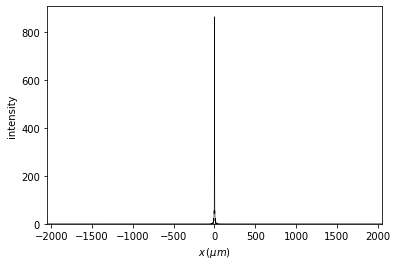

In [3]:
%%time
u2_rs = u1.RS(z=focal, verbose=False)
u2_rs.draw()
plt.xlim(-25, 25)

**CZT**

CPU times: user 42.3 ms, sys: 2.84 ms, total: 45.1 ms
Wall time: 43.4 ms


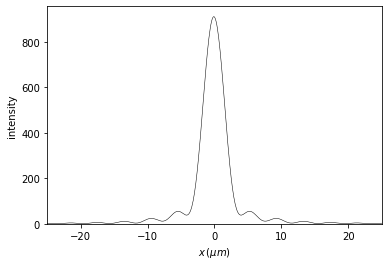

In [4]:
%%time
xout=np.linspace(-25,25,512)
u2_czt = u1.CZT(z=focal, xout=xout)
u2_czt.draw()


## XZ scheme

In [5]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

In [6]:
focal = 15 * mm
diameter = 4 * mm

x0 = np.linspace(-diameter / 2, diameter / 2, 1024)
wavelength = 0.6238 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.lens(x0=0.0, radius=diameter / 2, focal=focal)

u1 = u0 * t0

**RS**

CPU times: user 961 ms, sys: 36.4 ms, total: 997 ms
Wall time: 992 ms


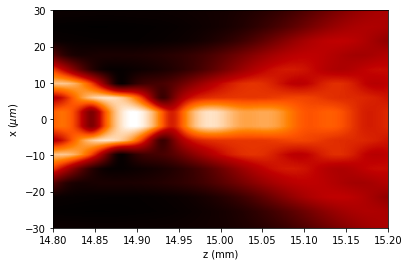

In [7]:
%%time
z0 = np.linspace(14.8*mm, 15.2*mm, 512)
u2_rs = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u2_rs.incident_field(u1)
u2_rs.RS(num_processors=1);
u2_rs.draw(logarithm=1e-1, z_scale='mm')
plt.ylim(-30,30)


**CZT**

CPU times: user 1.56 s, sys: 17.6 ms, total: 1.58 s
Wall time: 1.58 s


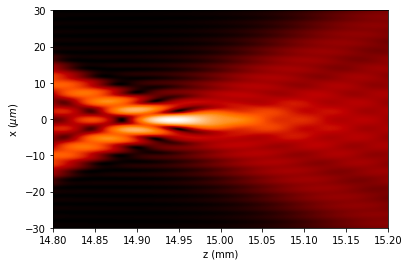

In [8]:
%%time
xout=np.linspace(-30,30,256)
u2_czt = u1.CZT(z=z0, xout=xout)
u2_czt.draw(logarithm=1e-1, z_scale='mm')


### XY scheme

In [9]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

In [10]:
diameter = 2 * mm
focal = 25 * mm

x0 = np.linspace(-diameter / 2, diameter / 2, 1024)
y0 = np.linspace(-diameter / 2, diameter / 2, 1024)
wavelength = 0.6238 * um

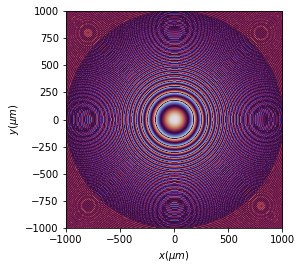

In [11]:
u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.plane_wave()

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.lens(r0=(0 * um, 0 * um), radius=(diameter / 2, diameter / 2), focal=(focal, focal))

t0.draw("phase")

u1 = u0 * t0

**RS**

CPU times: user 2.18 s, sys: 264 ms, total: 2.44 s
Wall time: 2.21 s


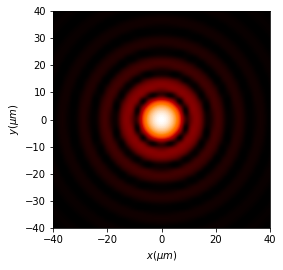

In [12]:
%%time
u2_rs = u1.RS(z=focal)

u2_rs.cut_resample(x_limits=(-40, 40),
                   y_limits=(-40, 40),
                   num_points=(128, 128),
                   new_field=False,
                   interp_kind=(3, 1))

u2_rs.draw(logarithm=1e-2)


**CZT**

CPU times: user 532 ms, sys: 171 ms, total: 702 ms
Wall time: 448 ms


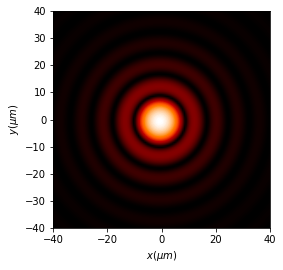

In [13]:
%%time
xout=np.linspace(-40,40,128)
yout=np.linspace(-40,40,128)
u2_czt = u1.CZT(z=focal, xout=xout, yout=yout)

u2_czt.draw(logarithm=1e-2)
